# Diffusion processes in networks¶



## 1. Epidemic modeling

Explain the model

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx



Simple matematical model for SI (susceptible-infected)
- $S(t)$ susceptible: people not yet infected at time $t$
- $I(t)$ infected: people infected at time $t$

The equations of the model are

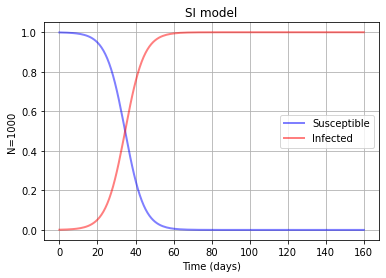

In [ ]:
# Total population, N
N = 1000

# Initial number of infected individuals, I0
I0 = 1

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0

# Contact rate beta
beta = 0.2

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SI model differential equations.
def deriv(y, t, N, beta):
    S, I = y
    dSdt = -beta * S / N * I
    dIdt = beta * S * I / N
    return dSdt, dIdt

# Initial conditions vector
y0 = S0, I0

# Integrate the SI equations over the time grid, t. (differential equation solver)
ret = odeint(deriv, y0, t, args=(N, beta))
S, I = ret.T

# Plot the data on three separate curves for S(t) and I(t)
fig = plt.figure(facecolor='w')
plt.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
plt.xlabel('Time (days)')
plt.ylabel('N=1000')
plt.title('SI model')
plt.grid(True)
plt.legend()
plt.show()

In a SIS model (susceptible-infected-susceptible) the states are the same
- $S(t)$ susceptible: people not yet infected at time $t$
- $I(t)$ infected: people infected at time $t$

but people can be reinfected one recovered.

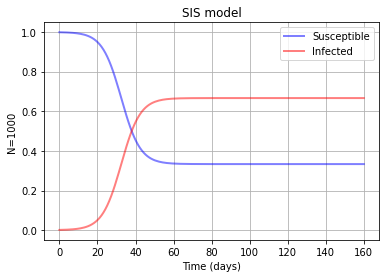

In [ ]:
# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0 = 1

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.3, 1./10
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I = y
    dSdt = -beta * S / N * I + gamma * I
    dIdt = beta * S * I / N - gamma * I
    return dSdt, dIdt

# Initial conditions vector
y0 = S0, I0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I = ret.T

# Plot the data on three separate curves for S(t) and I(t)
fig = plt.figure()
plt.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
plt.xlabel('Time (days)')
plt.ylabel('N=1000')
plt.title('SIS model')
plt.grid(True)
plt.legend()
plt.show()

A SIS model has two possible outcomes
- endemic state $\gamma < \beta$
- disease free $\gamma > \beta$

We write the characteristic time of a pathogen as

$$ \tau = \frac{1}{\gamma(R_0-1)}$$

where $R_0$ is the reproduction number

$$R_0 = \frac{\beta}{\gamma}$$

It represents the average number of susceptible individulas infected by one infected person. If $R_0 > 1$ the cases incresases (exponentially if $R_0 \geq 2$)

In [ ]:
R0 = beta / gamma
tau = 1 / (gamma * (R0 - 1))
print("Rep number R0 =", R0)
print("Char time tau =", tau, "days")

Rep number R0 = 2.9999999999999996
Char time tau = 5.000000000000001 days


In a SIR model people can be in three states
- $𝑆(𝑡)$  susceptible: people not yet infected at time  $𝑡$
- $𝐼(𝑡)$  infected: people infected at time  $𝑡$
- $R(t)$ removed: people that have recovered for the disease or have dead

Once removed, people is inmune and can't be reinfected

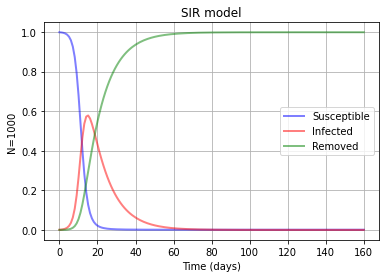

In [ ]:
# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.7, 1./10

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIS model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t) and I(t)
fig = plt.figure()
plt.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Removed')
plt.xlabel('Time (days)')
plt.ylabel('N=1000')
plt.title('SIR model')
plt.grid(True)
plt.legend()
plt.show()

**Exercise:**
Modify the model to include deaths due to the disease. Use a $\mu$ parameter and include it in the equation

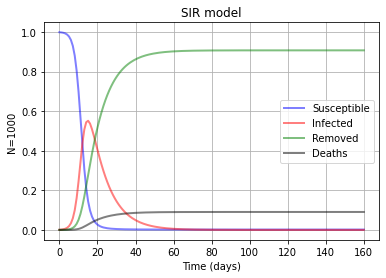

In [ ]:
# your code here

# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0, D0 = 1, 0, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - D0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma, mu = 0.7, 1./10, 0.01

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIRD model differential equations.
def deriv(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T

# Plot the data on three separate curves for S(t) and I(t)
fig = plt.figure()
plt.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Removed')
plt.plot(t, D/N, 'k', alpha=0.5, lw=2, label='Deaths')
plt.xlabel('Time (days)')
plt.ylabel('N=1000')
plt.title('SIR model')
plt.grid(True)
plt.legend()
plt.show()

## 2. Epidemics in networks

Implement a SI model over a contact network
- add all nodes to a S set / list
- chose randomly an infected node and add it to a I set
- repeat until end of period
    - identify the neighbors of currently infected nodes
    - infect them with a probability beta
    - add the new infected nodes to I
    - remove the new infected nodes from S

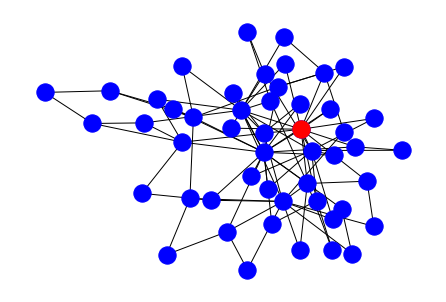

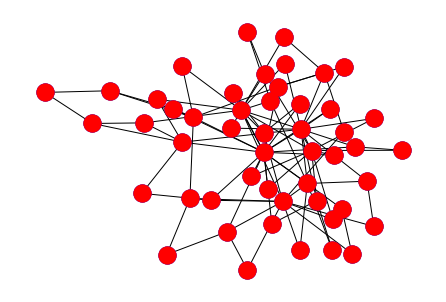

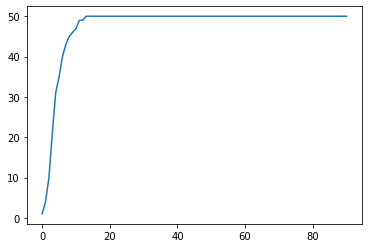

In [ ]:
# your code here
import networkx as nx

n = 50
G = nx.barabasi_albert_graph(n,2)
pos = nx.spring_layout(G)
nx.draw(G,pos=pos,node_color='blue')

# one infected node
S = set(np.random.permutation(G.nodes()))
I = {S.pop()}
num_infected = [1]

nx.draw_networkx_nodes(G.subgraph(I),pos=pos,node_color='red')
plt.show()

beta = 0.2
num_iter = 90

for day in range(num_iter):
    # equivalent to
    # neigs =  nx.node_boundary(G, I)
    neigs = [neig for (infected, neig) in G.edges(I)]
    # infection following beta parameter
    # generate random values, keep values under beta, and retrieve indexes
    is_infected = np.where(np.random.rand(len(neigs)) < beta)
    to_infect = np.array(neigs)[is_infected]
    if any(to_infect):
        I.update(set(to_infect) - I)
        S.discard(set(to_infect))
        num_infected.append(len(I))

# plot all nodes
nx.draw(G,pos=pos,node_color='blue')
# overwrte infected nodes in red
nx.draw_networkx_nodes(G.subgraph(I),pos=pos,node_color='red',label="I")
plt.show()

# plot evolution of infected
plt.plot((num_infected))
plt.show()

## 3. Diffusion over dynamic networks

Simulate a model a difusion transimion in a dynamic network
- nodes in a random geometric graph (see funcion `random_geometric_grpah`)
- implement a SI model on the network
- introduce dynamics: nodes change position with random walks
- compare evolution in the three results
  - complete SI for each case (each case in one plot)
  - compare I in all the cases (same plot)
    

radius = 0.18160975180197303


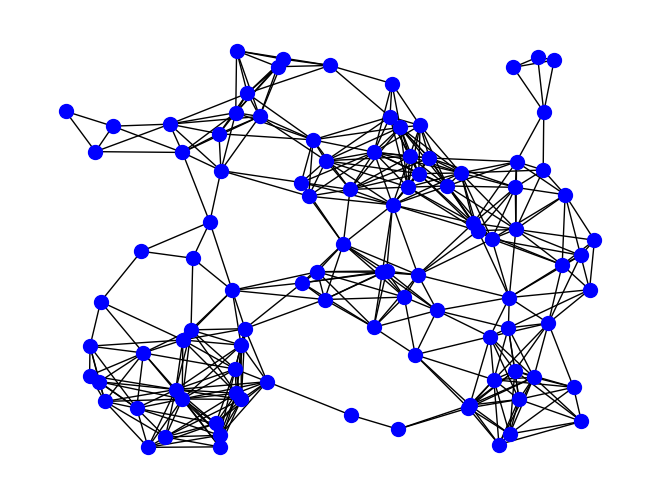

In [5]:
# random geometric graph (RGG): Spatial random network in the 1-square
n = 100
# radius to generate near connected graphs
r = np.sqrt(np.log(n) / (np.pi * n)) * 1.5
print(f"radius = {r}")

# generates the network
G = nx.random_geometric_graph(n, r)
# get coordinates of the nodes
latlon = nx.get_node_attributes(G,'pos')
# plot the graph
nx.draw(G, pos=latlon,
        node_color='b', node_size=100)


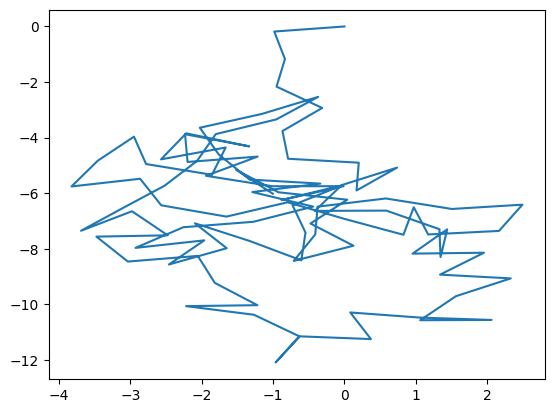

In [6]:
# random walk sample
import numpy as np
import matplotlib.pyplot as plt

x = [0]
y = [0]
num_steps = 100

for i in range(num_steps):
    # random heading
    alpha = np.random.rand() * 2 * np.pi
    # step in the new direction
    x.append(x[i] + np.cos(alpha))
    y.append(y[i] + np.sin(alpha))

plt.plot(x,y);

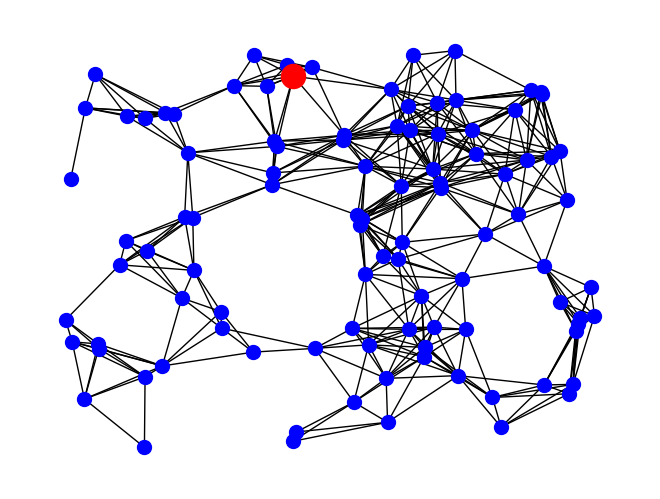

In [23]:
# generate initial graph
G = nx.random_geometric_graph(n, r)
latlon = nx.get_node_attributes(G,'pos')
nx.draw(G, pos=latlon,
      node_color='b', node_size=100)

# one infected node
S = set(np.random.permutation(G.nodes()))
I = {S.pop()}
num_infected = [1]
nx.draw_networkx_nodes(G.subgraph(I),pos=latlon,node_color='red')
plt.show()

#disease parameters
beta = 0.2

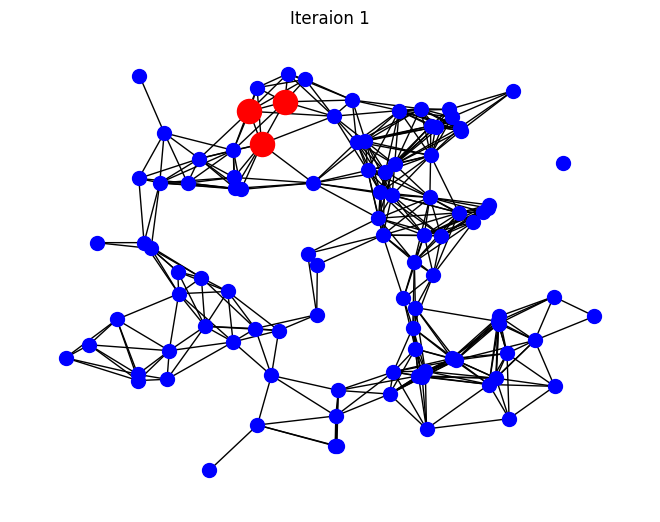

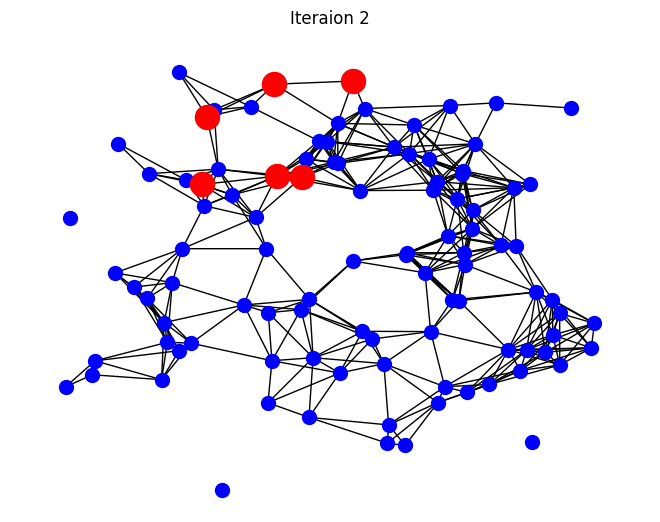

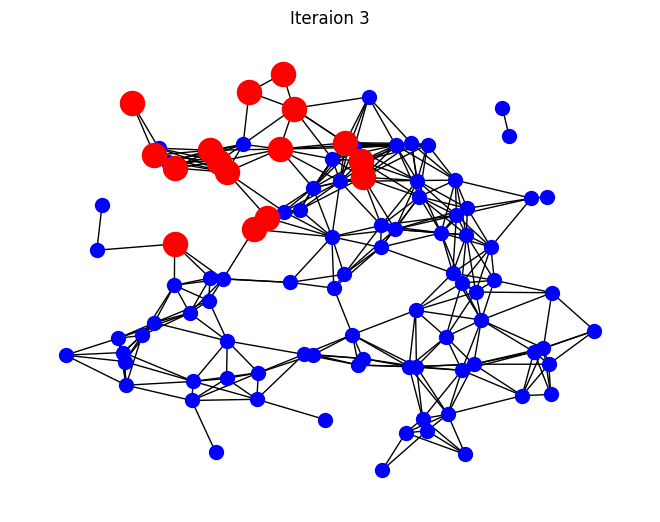

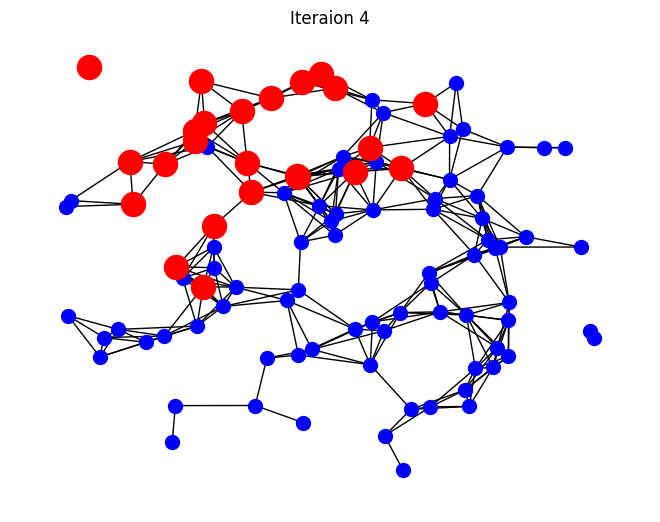

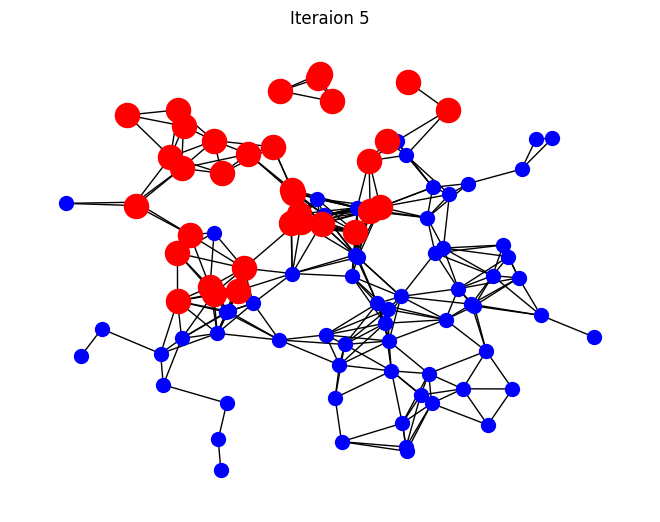

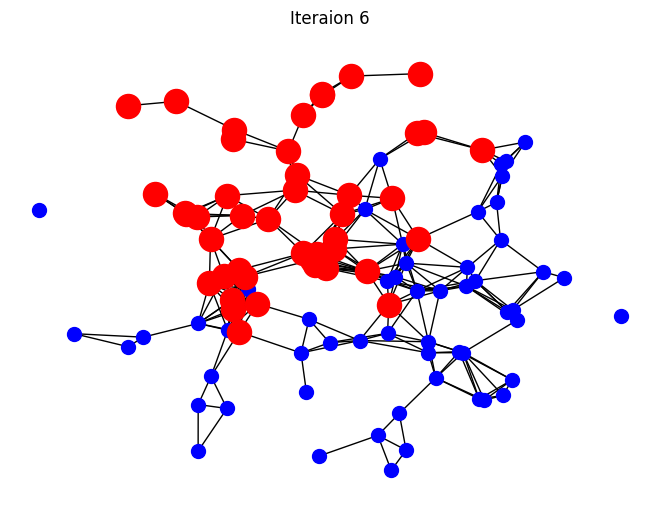

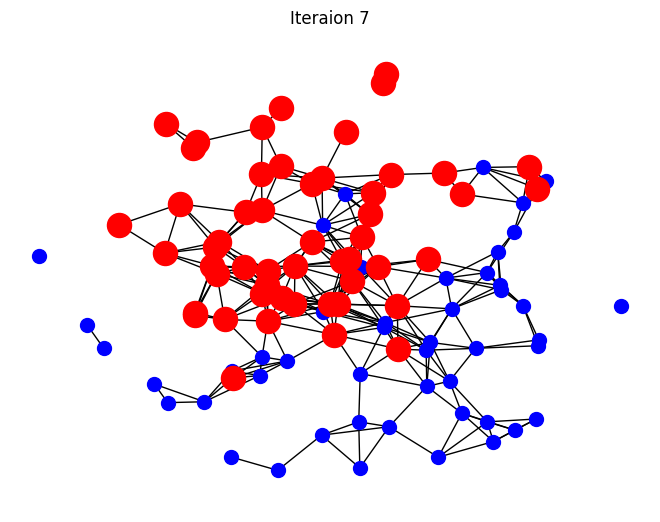

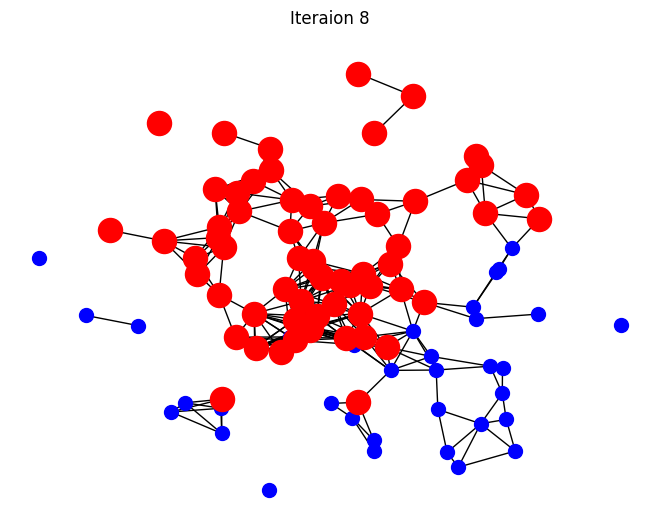

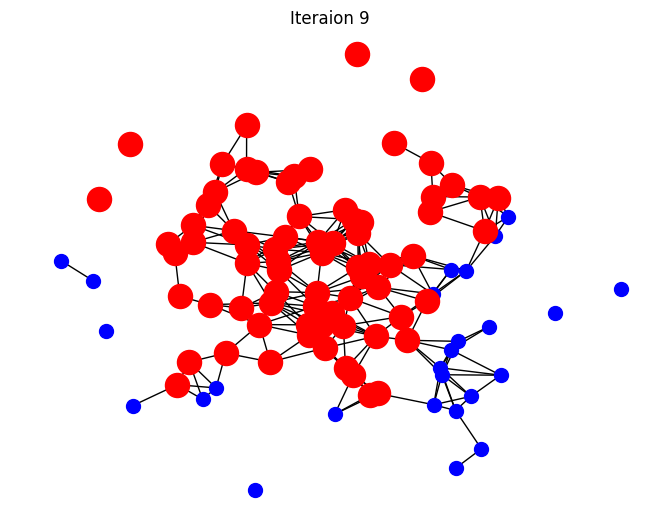

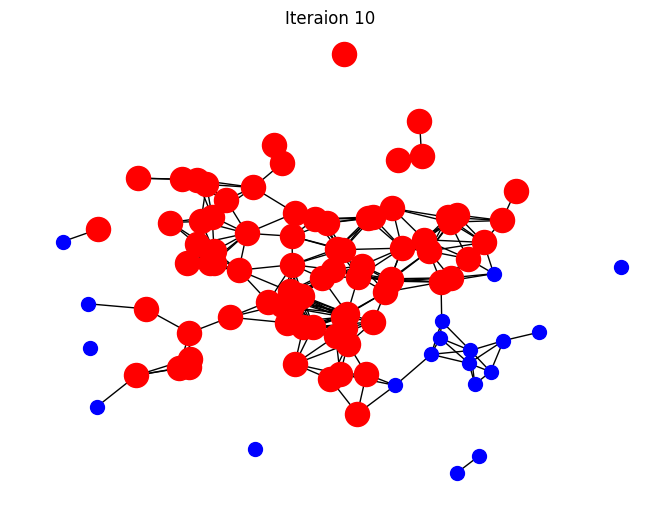

In [24]:
niter = 10

# dynamics
for iter in range(niter):
  # 1. disease propagation
  neigs = [neig for (infected, neig) in G.edges(I)]
  # infection following beta parameter
  # generate random values, keep values under beta, and retrieve indexes
  is_infected = np.where(np.random.rand(len(neigs)) < beta)
  to_infect = np.array(neigs)[is_infected]
  if any(to_infect):
      I.update(set(to_infect) - I)
      S.discard(set(to_infect))
      num_infected.append(len(I))

  # 2. agent movements
  # get current coordinates
  coor = np.array(list(latlon.values()))
  # update position with random walk
  angle = np.random.rand(n).reshape((n,)) * 2 * np.pi
  coor = coor + np.transpose([np.cos(angle)*0.1, np.sin(angle)*0.1])
  latlon = dict(enumerate(coor.tolist(),0))
  # updates node coordinates in the graph
  G = nx.random_geometric_graph(n, r, pos=latlon)

  # 3. plot the new situation
  nx.draw(G, pos=latlon,
          node_color='b', node_size=100)
  nx.draw_networkx_nodes(G.subgraph(I),pos=latlon,node_color='red',label="I")
  plt.title("Iteraion "+str(iter+1))
  plt.show()

## 4. Inmunization

To inmunize a part of the network, you can make them invisible for the infected nodes. Yo can do it just removing them from the susceptible list.

Implement a SI model with inmunization
- compare random and scale-free networks
- try random and selective inmunization (degree and betweenness)
- (optional) find experimentally (trial and error) the **herd inmunity** value

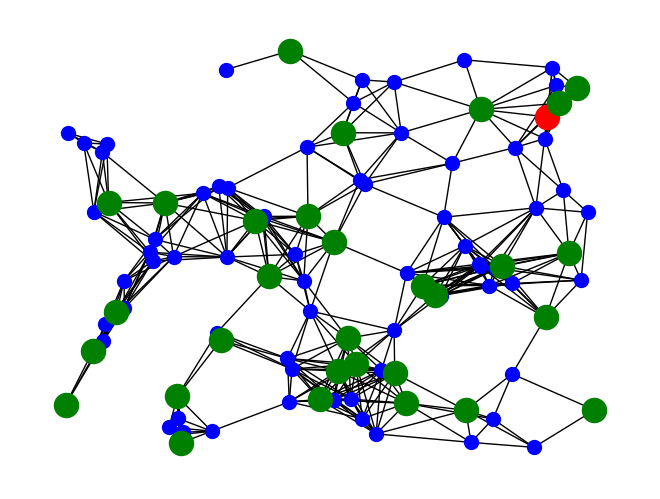

In [46]:
G = nx.random_geometric_graph(n, r)
latlon = nx.get_node_attributes(G,'pos')

# percentage of immune people
pimm = 0.3
nimm = int(pimm * n)

# remove immunes and one infected node
S = np.random.permutation(G.nodes())
Im = set(S[:nimm])
S = set(S[nimm:])
I = {S.pop()}
num_infected = [1]

# plot the graph
nx.draw(G, pos=latlon,
        node_color='b', node_size=100)
nx.draw_networkx_nodes(G.subgraph(I),pos=latlon,node_color='red')
nx.draw_networkx_nodes(G.subgraph(Im),pos=latlon,node_color='green')
plt.show()

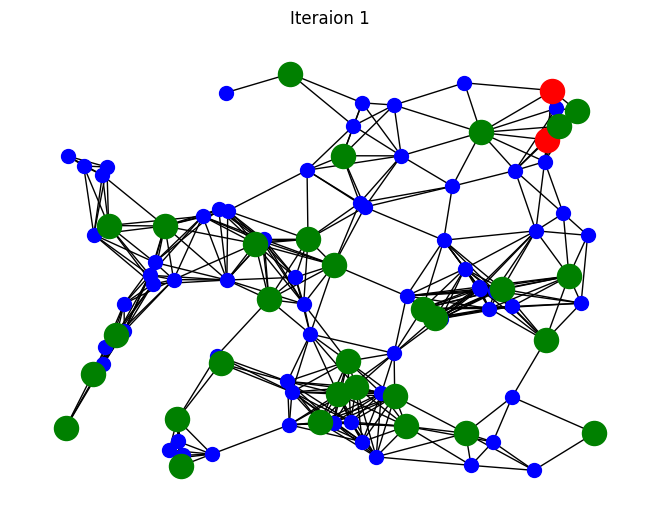

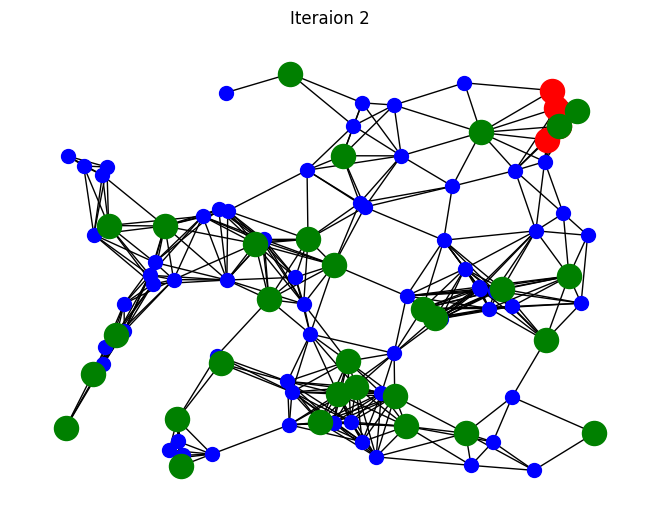

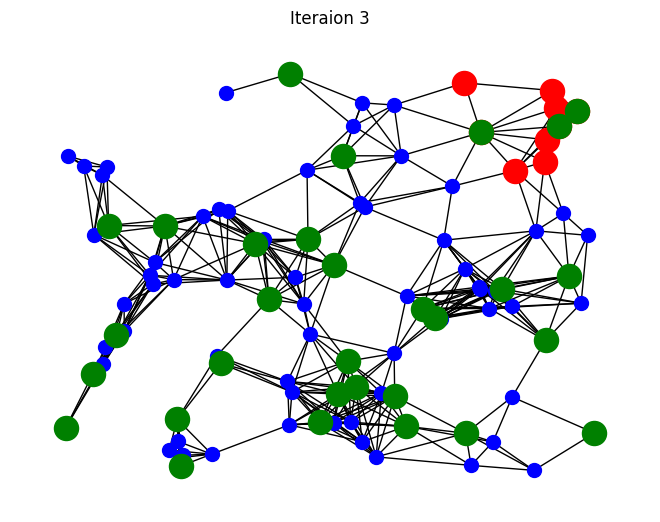

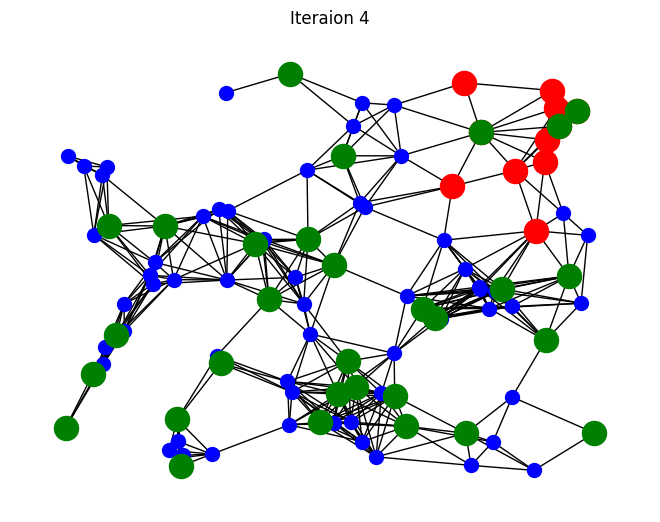

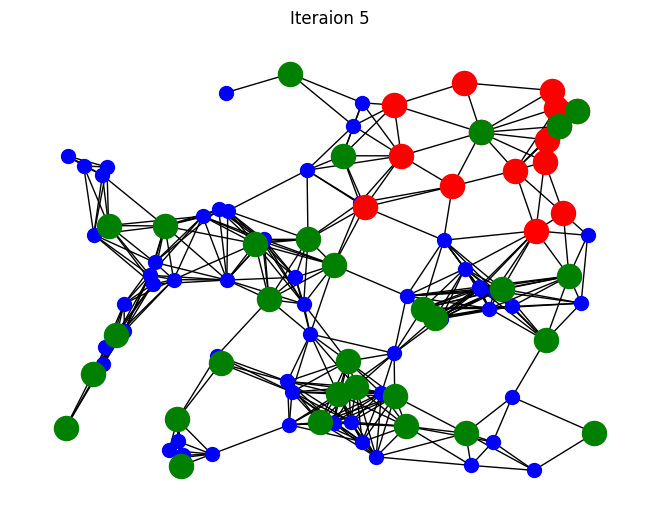

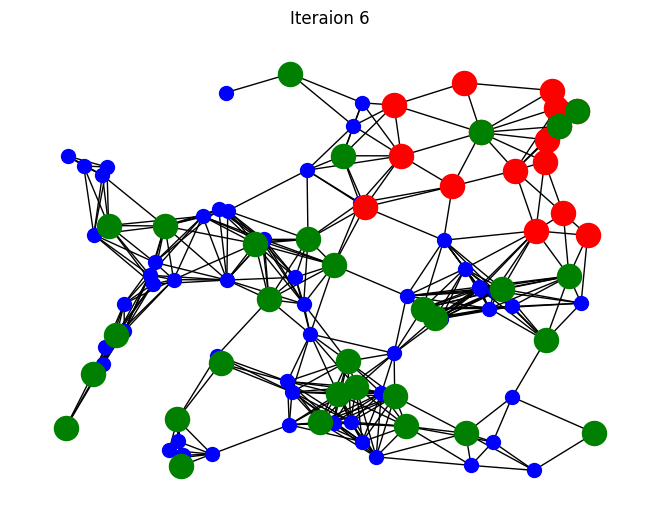

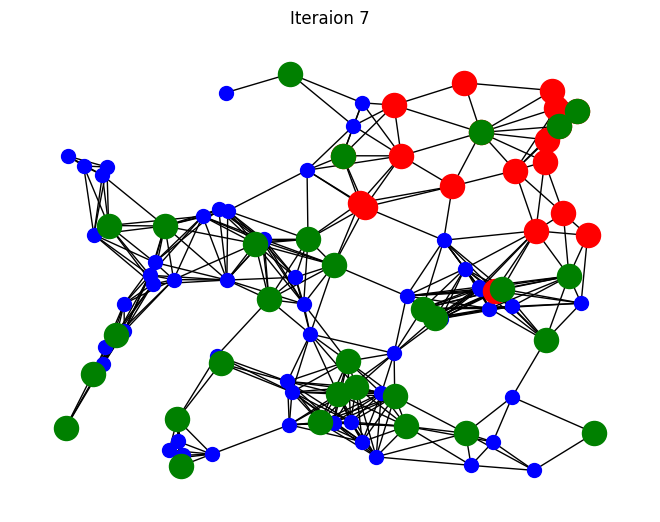

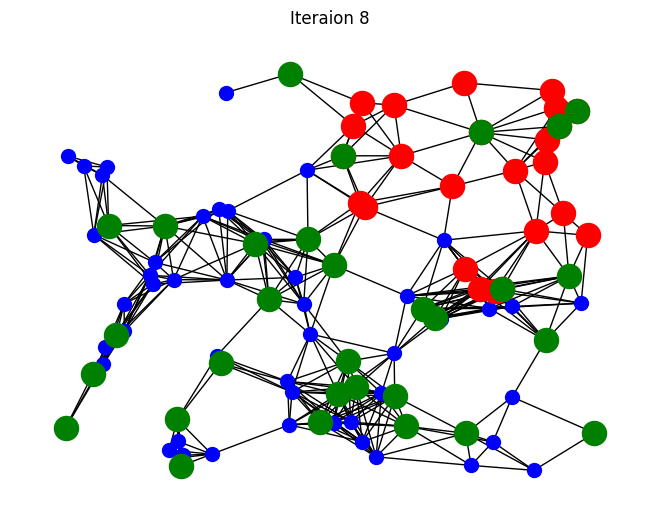

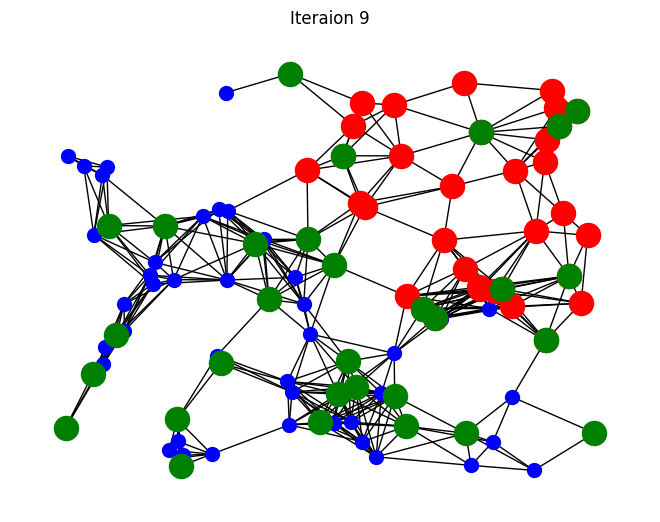

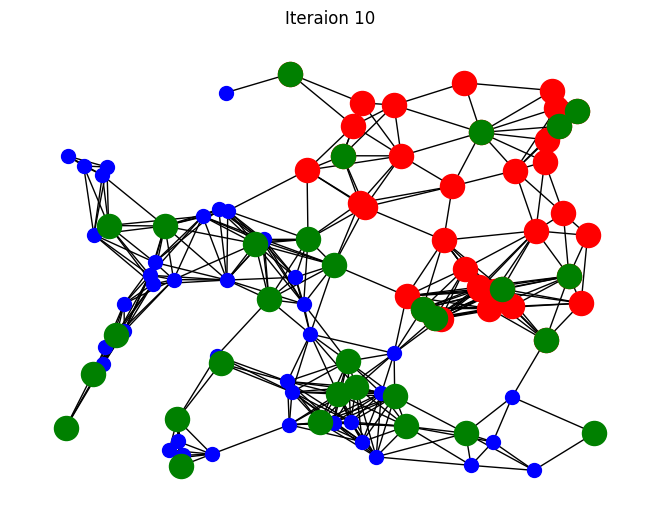

In [47]:
niter = 10

# dynamics
for iter in range(niter):
  # 1. disease propagation
  neigs = [neig for (infected, neig) in G.edges(I)]
  # infection following beta parameter
  # generate random values, keep values under beta, and retrieve indexes
  is_infected = np.where(np.random.rand(len(neigs)) < beta)
  to_infect = np.array(neigs)[is_infected]
  if any(to_infect):
      I.update(set(to_infect) - I)
      S.discard(set(to_infect))
      num_infected.append(len(I))

  # 2. plot the new situation
  nx.draw(G, pos=latlon,
          node_color='b', node_size=100)
  nx.draw_networkx_nodes(G.subgraph(I),pos=latlon,node_color='red',label="I")
  nx.draw_networkx_nodes(G.subgraph(Im),pos=latlon,node_color='green',label="Im")

  plt.title("Iteraion "+str(iter+1))
  plt.show()

In [ ]:
# your code: repeat it with other network structures